In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# Sequential Model API

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [4]:
model =  Sequential([Dense(16, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')])
#weights are not initialized here

In [3]:
# add the initial input dimension to initialize the weights

model =  Sequential([Flatten(input_shape=(28, 28)),
                     Dense(16, activation='relu', name='layer_1'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')])

In [4]:
model.weights #to check weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.02538602, -0.03426778, -0.07791629, ..., -0.04346812,
         -0.03013438, -0.01487678],
        [ 0.04378834,  0.0153736 , -0.00105908, ...,  0.04872558,
          0.00938172,  0.06183191],
        [-0.0323507 , -0.06716639, -0.00285297, ..., -0.07692802,
          0.05680972,  0.06194384],
        ...,
        [ 0.03198528,  0.01143979, -0.03314772, ...,  0.0233821 ,
         -0.00523664,  0.03298626],
        [-0.0510334 ,  0.03942905,  0.05763724, ...,  0.06961794,
          0.01136139,  0.02247064],
        [ 0.04633969,  0.01366693, -0.00966156, ...,  0.03069183,
         -0.07189957,  0.03627409]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 2.72369117e-01, -2.04691663e-01, -2.10178778e-

In [5]:
model.summary() #to check the summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


## Convolution and Pooling Layer

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential([Conv2D( 16, (3,3), padding='SAME', activation='relu', input_shape=(28,28,1) ),
                   MaxPooling2D((3,3)),
                   Flatten(),
                   Dense(10, activation='softmax')])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


In [12]:
#channel first
model = Sequential([Conv2D( 16, (3,3), padding='SAME', activation='relu', input_shape=(1, 28,28), data_format='channels_first' ),
                   MaxPooling2D((3,3), data_format='channels_first'),
                   Flatten(),
                   Dense(10, activation='softmax')])

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 28, 28)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 9, 9)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12970     
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________


## Weight Initialising

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D 

In [15]:
%matplotlib inline

In [16]:
# Construct a model

model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

In [17]:
# Add some layers to our model

model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

In [18]:
#custom weight and bias
import tensorflow.keras.backend as K

# Define a custom initializer

def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 16)           3088      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 31, 16)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 496)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                31808     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

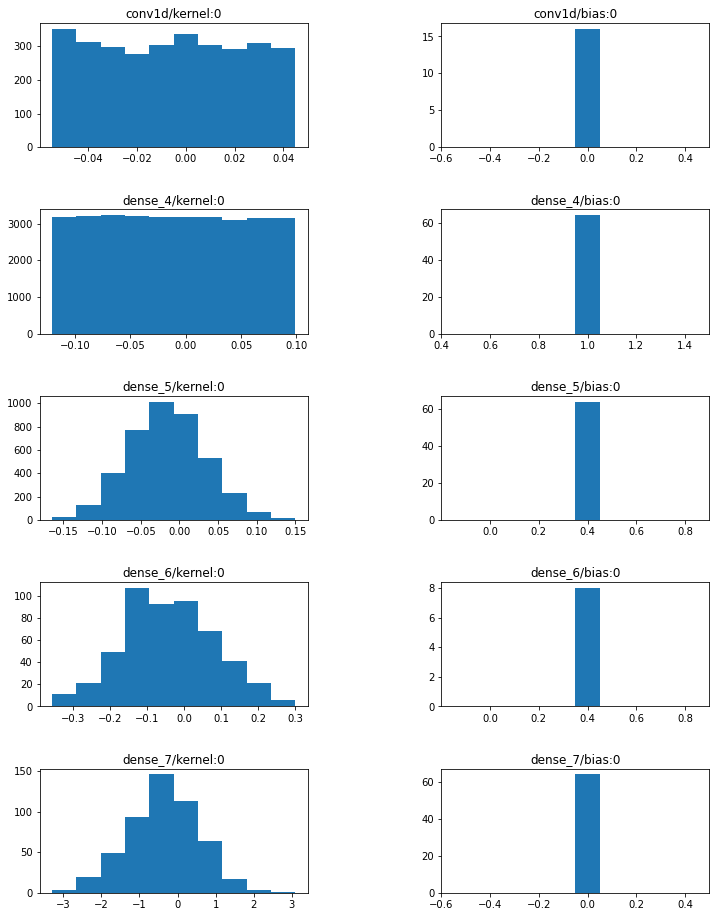

In [20]:
import matplotlib.pyplot as plt

# Plot histograms of weight and bias values

fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

In [27]:
model.layers[0].weights

[<tf.Variable 'conv1d/kernel:0' shape=(3, 64, 16) dtype=float32, numpy=
 array([[[ 0.02337965, -0.03214063, -0.02200521, ...,  0.00693613,
          -0.04812172,  0.02507276],
         [ 0.02199114,  0.02416776, -0.04854736, ..., -0.00122281,
          -0.03158519,  0.01471366],
         [-0.00704501,  0.01702141, -0.0400878 , ...,  0.01874467,
          -0.00940776,  0.02654728],
         ...,
         [-0.00181808, -0.03718961,  0.00546797, ...,  0.0077014 ,
           0.03515604, -0.0475377 ],
         [ 0.0108104 ,  0.0162526 , -0.01080912, ...,  0.00223918,
           0.04407544, -0.02335483],
         [ 0.03374987,  0.00956967,  0.02341348, ..., -0.0405171 ,
           0.00965909, -0.04367802]],
 
        [[-0.04887831, -0.04821552,  0.02676289, ..., -0.01207808,
          -0.03409256,  0.04134798],
         [ 0.03016502,  0.04829792,  0.03834237, ..., -0.01603898,
          -0.03845054, -0.017515  ],
         [-0.00216281, -0.04926044,  0.03905395, ..., -0.04022882,
          -0

## Compile the Model

In [42]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=[acc, mae])

In [43]:
print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[]


In [45]:
model.loss

'sparse_categorical_crossentropy'

In [47]:
model.metrics #not working here, some error with tf

[]

## Training: Fit Method: Fashion Data

In [48]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [49]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 7s 2us/step


In [51]:
model = Sequential([Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1) ),
                   MaxPooling2D((3,3)),
                   Flatten(),
                   Dense(10, activation='softmax')])

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [53]:
#compile method
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=[acc, mae])

In [65]:
model.metrics

In [54]:
train_images.shape

(60000, 28, 28)

In [55]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [56]:
train_images = train_images/255.
test_images = test_images/255.

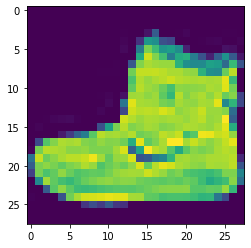

lavel:Ankle boot


In [57]:
# Display one of the images

i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'lavel:{labels[train_labels[i]]}')

In [59]:
img.shape

(28, 28)

In [75]:
#fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=20, batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 10ms/step - loss: 0.3071 - sparse_categorical_accuracy: 0.8907 - mean_absolute_error: 4.4200
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.3050 - sparse_categorical_accuracy: 0.8917 - mean_absolute_error: 4.4200
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2999 - sparse_categorical_accuracy: 0.8941 - mean_absolute_error: 4.4200
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2972 - sparse_categorical_accuracy: 0.8952 - mean_absolute_error: 4.4200
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2951 - sparse_categorical_accuracy: 0.8957 - mean_absolute_error: 4.4200
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2914 - sparse_categorical_accuracy: 0.8968 - mean_absolute_error: 4.4200
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.2915 - sparse_categoric

### plot training

In [76]:
history

In [77]:
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.307110,0.890667,4.419999
1,0.305014,0.891750,4.420002
2,0.299865,0.894117,4.419999
3,0.297240,0.895167,4.420000
4,0.295121,0.895750,4.420000


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

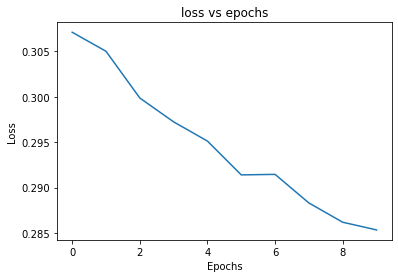

In [78]:
loss_plot = df.plot(y='loss', title = 'loss vs epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'accuracy')]

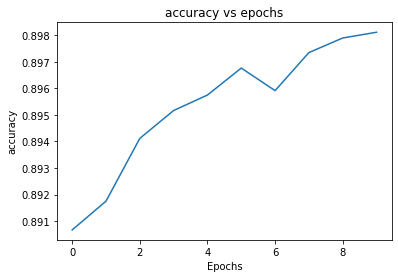

In [79]:
acc_plot = df.plot(y='sparse_categorical_accuracy', title = 'accuracy vs epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='accuracy')

### evaluate

In [82]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 0s - loss: 0.3170 - sparse_categorical_accuracy: 0.8855 - mean_absolute_error: 4.4200


In [83]:
test_loss

0.31703075766563416

### Predict

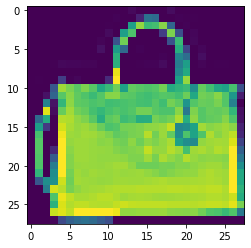

label:Bag


In [88]:
inx = 30

test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f'label:{labels[test_labels[inx]]}')

In [91]:
prediction = model.predict(test_image[np.newaxis,...,np.newaxis])

In [93]:
labels[np.argmax(prediction)]

'Bag'